# Estimate mass in the "rat nebula"

This notebook just attempts to estimate the mass in plasma based on the recombination lines.

The short conclusion is: perhaps there are 1-2 M$_\odot$ of plasma in this nebula?  That seems like a lot...

# F405N image

Mean flux ~ 88 +/- 88 MJy/sr
(re-measured it's 84 +/- 84...)



In [1]:
from astropy.io import fits
import regions
import reproject
from astropy.wcs import WCS
import warnings
import pylab as pl
from astropy.visualization import simple_norm

In [2]:
from astropy import units as u

In [3]:
basepath = '/Users/adam/work/westerlund/'
fh444 = fits.open(f'{basepath}/jw01905-o001_t001_nircam_clear-f444w_i2d.fits')
fh405 = fits.open(f'{basepath}/jw01905-o001_t001_nircam_f405n-f444w_i2d.fits')
fh187 = fits.open(f'{basepath}/wd1_f187n_moduleAB_i2d_v2-001.fits')
fh212 = fits.open(f'{basepath}/wd1_f212n_moduleAB_i2d_v2-006.fits')

In [4]:
# cometary cloud = rat
reg = regions.Regions.read(f'{basepath}/cometary_cloud.reg')

In [5]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ww405 = WCS(fh405['SCI'].header)
preg = reg[0].to_pixel(ww405)
mask405 = preg.to_mask()
vals405 = mask405.get_values(fh405['SCI'].data)
mean_f405 = vals405.mean() * u.MJy/u.sr
std_f405 = vals405.std() * u.MJy/u.sr
print(mean_f405, std_f405)

84.79552804463059 MJy / sr 85.32385471308719 MJy / sr


In [6]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ww444 = WCS(fh444['SCI'].header)
preg = reg[0].to_pixel(ww444)
mask444 = preg.to_mask()
vals444 = mask444.get_values(fh444['SCI'].data)
mean_f444 = vals444.mean() * u.MJy/u.sr
std_f444 = vals444.std() * u.MJy/u.sr
slcs_big_444, slcs_small = mask444.get_overlap_slices(fh444['SCI'].data.shape)
print(f"Continuum (free-free) estimate from 444: {mean_f444} +/- {std_f444}")

Continuum (free-free) estimate from 444: 24.395626741759266 MJy / sr +/- 18.285838634857452 MJy / sr


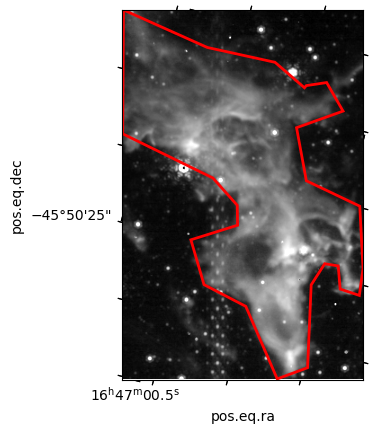

In [7]:
slcs_big_405, slcs_small = mask405.get_overlap_slices(fh405['SCI'].data.shape)
ax = pl.subplot(projection=ww405[slcs_big_405])
cutout = fh405['SCI'].data[slcs_big_405]
ax.imshow(cutout, norm=simple_norm(cutout, vmin=0, vmax=500, stretch='asinh'), cmap='gray');
reg[0].to_pixel(ww405[slcs_big_405]).plot(edgecolor='r');

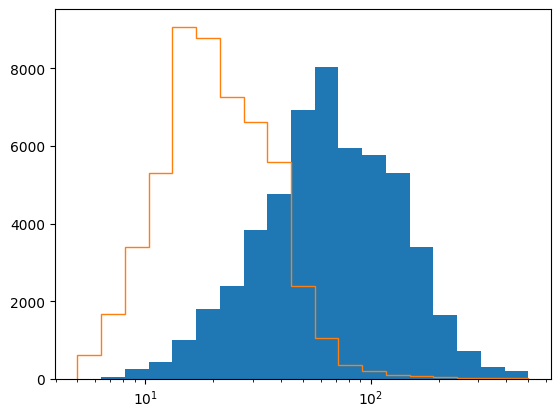

In [8]:
pl.hist(vals405, bins=np.geomspace(5, 500, 20));
pl.hist(vals444, bins=np.geomspace(5, 500, 20), histtype='step');
pl.xscale('log')

## Repeat for F187

80 +/- 120.  Lots of variation.

In [9]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ww187 = WCS(fh187['SCI'].header)
preg = reg[0].to_pixel(ww187)
mask187 = preg.to_mask()
vals187 = mask187.get_values(fh187['SCI'].data)
mean_f187 = vals187.mean() * u.MJy/u.sr
std_f187 = vals187.std() * u.MJy/u.sr
print(mean_f187, std_f187)

80.86076960131253 MJy / sr 121.74158852520826 MJy / sr


In [10]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ww212 = WCS(fh212['SCI'].header)
preg212 = reg[0].to_pixel(ww212)
mask212 = preg212.to_mask()
vals212 = mask212.get_values(fh212['SCI'].data)
mean_f212 = vals212.mean() * u.MJy/u.sr
std_f212 = vals212.std() * u.MJy/u.sr
slcs_big_212, slcs_small = mask212.get_overlap_slices(fh212['SCI'].data.shape)
print(f"Continuum (free-free) estimate from 212: {mean_f212} +/- {std_f212}")

Continuum (free-free) estimate from 212: 13.817133837067015 MJy / sr +/- 107.16155184595355 MJy / sr


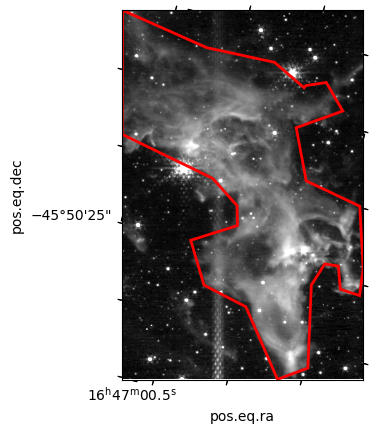

In [11]:
slcs_big_187, slcs_small = mask187.get_overlap_slices(fh187['SCI'].data.shape)
ax = pl.subplot(projection=ww187[slcs_big_187])
cutout187 = fh187['SCI'].data[slcs_big_187]
ax.imshow(cutout187, norm=simple_norm(cutout187, vmin=0, vmax=500, stretch='asinh'), cmap='gray');
reg[0].to_pixel(ww187[slcs_big_187]).plot(edgecolor='r');

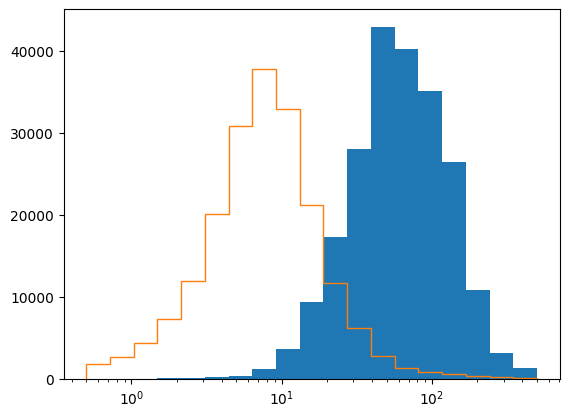

In [12]:
pl.hist(vals187, bins=np.geomspace(0.5, 500, 20));
pl.hist(vals212, bins=np.geomspace(0.5, 500, 20), histtype='step');
pl.xscale('log')

# Examine pixel-by-pixel line ratio

first project 405 to 187 (upsample)

/Users/adam/mambaforge/envs/py310forge/lib/python3.10/site-packages/reproject/spherical_intersect/core.py:35: UserWarning: The reproject_exact function currently has precision issues with images that have resolutions below ~0.05 arcsec, so the results may not be accurate.
  warnings.warn(
/Users/adam/mambaforge/envs/py310forge/lib/python3.10/site-packages/reproject/spherical_intersect/core.py:35: UserWarning: The reproject_exact function currently has precision issues with images that have resolutions below ~0.05 arcsec, so the results may not be accurate.
  warnings.warn(
/Users/adam/mambaforge/envs/py310forge/lib/python3.10/site-packages/reproject/spherical_intersect/core.py:35: UserWarning: The reproject_exact function currently has precision issues with images that have resolutions below ~0.05 arcsec, so the results may not be accurate.
  warnings.warn(
/var/folders/k_/7qh4l0nn72b7qgq15pkd4hw40000gt/T/ipykernel_60854/4191236847.py:17: RuntimeWarning: divide by zero encountered in d

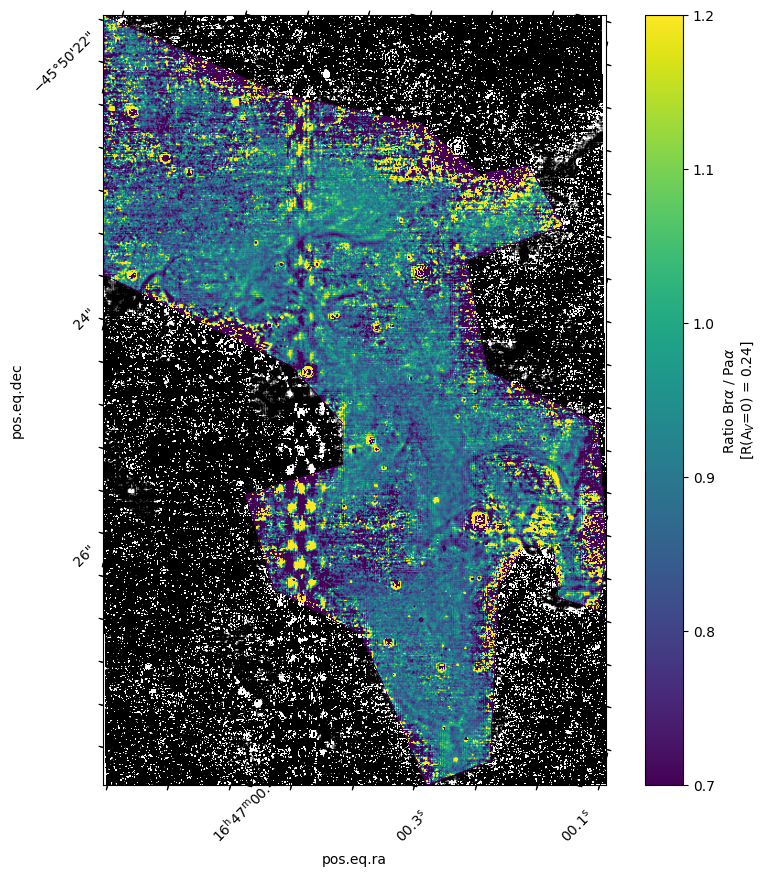

In [13]:
pl.figure(figsize=(10,10))
ax = pl.subplot(projection=ww187[slcs_big_187] )
cutout405in187pix, _ = reproject.reproject_exact((fh405['SCI'].data[slcs_big_405],
                           ww405[slcs_big_405]),
                          ww187[slcs_big_187], 
                          shape_out=cutout187.shape)
cutout444in187pix, _ = reproject.reproject_exact((fh444['SCI'].data[slcs_big_444],
                           ww444[slcs_big_444]),
                          ww187[slcs_big_187], 
                          shape_out=cutout187.shape)
cutout212in187pix, _ = reproject.reproject_exact((fh212['SCI'].data[slcs_big_212],
                           ww212[slcs_big_212]),
                          ww187[slcs_big_187], 
                          shape_out=cutout187.shape)


ratio = (cutout405in187pix - cutout444in187pix) / (cutout187 - cutout212in187pix)

# HACK display - this is backward
pl.imshow(ratio * mask187.data, vmin=0.7, vmax=1.2, cmap='viridis')
cb = pl.colorbar();
cb.set_label(r"Ratio Br$\alpha$ / Pa$\alpha$""\n[R(A$_V$=0) = 0.24]")
ratio[mask187.data.astype('bool')] = np.nan
pl.imshow(ratio, vmin=0.9, vmax=1.5, cmap='gray')
ax.coords[1].set_ticklabel(rotation=45, pad=0)
ax.coords[0].set_ticklabel(rotation=45, pad=30) # without the pad, this will sometimes overlap with the axis boundary
ax.coords[1].set_ticks(spacing=2*u.arcsec)
ax.coords[0].set_ticks(spacing=2*u.arcsec)



ratio = cutout405in187pix / cutout187
ratio[~mask187.data.astype('bool')] = np.nan

1.0984480135233552

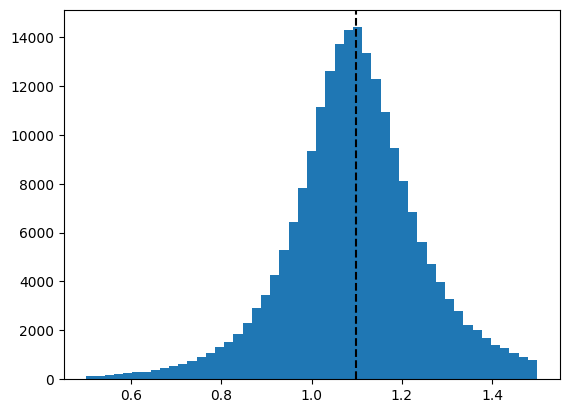

In [14]:
pl.hist(ratio[(mask187.data.astype('bool')) & np.isfinite(ratio)], bins=np.linspace(0.5, 1.5));
medratio = np.nanmedian(ratio[mask187.data.astype('bool')])
pl.axvline(medratio, linestyle='--', color='k');
medratio

# Do some simple estimates

In [15]:
lambda_bra = 4.05 * u.um
nu_bra = lambda_bra.to(u.THz, u.spectral())
lambda_paa = 1.87 * u.um
nu_paa = lambda_paa.to(u.THz, u.spectral())

In [16]:
# borrowing a lot of old work from https://github.com/keflavich/paa_analysis
import sys
sys.path.append('/Users/adam/work/paa_analysis/paper/')
from hii_sensitivity import *
from jwst_paa_estimates import *

c++ -std=c++11 -arch arm64 -arch x86_64   -Ofast -Wall  -DNDEBUG -DHAVE_INLINE -MMD -MP    -c -o pwind.o pwind.cpp


pwind.cpp:5:10: fatal error: 'gsl/gsl_errno.h' file not found
#include <gsl/gsl_errno.h>
         ^~~~~~~~~~~~~~~~~
1 error generated.
make: *** [pwind.o] Error 1


5sig ctrt try 1:  15.022848719623552
5sig ctrt try 2:  9.348667535586301


In [17]:
jwst_paa_tr = SvoFps.get_transmission_data('JWST/NIRCam.F187N')
jwst_paa_effectivewidth = (np.diff(jwst_paa_tr['Wavelength'].quantity) * jwst_paa_tr['Transmission'].quantity[1:]).sum() / jwst_paa_tr['Transmission'].quantity[1:].max()
jwst_paa_central_wavelength = (jwst_paa_tr['Wavelength'].quantity * jwst_paa_tr['Transmission'].quantity).sum() / jwst_paa_tr['Transmission'].quantity.sum()
jwst_paa_effectivewidth_hz = (jwst_paa_effectivewidth / jwst_paa_central_wavelength) * jwst_paa_central_wavelength.to(u.Hz, u.spectral())

jwst_bra_tr = SvoFps.get_transmission_data('JWST/NIRCam.F405N')
jwst_bra_effectivewidth = (np.diff(jwst_bra_tr['Wavelength'].quantity) * jwst_bra_tr['Transmission'].quantity[1:]).sum() / jwst_bra_tr['Transmission'].quantity[1:].max()
jwst_bra_central_wavelength = (jwst_bra_tr['Wavelength'].quantity * jwst_bra_tr['Transmission'].quantity).sum() / jwst_bra_tr['Transmission'].quantity.sum()
jwst_bra_effectivewidth_hz = (jwst_bra_effectivewidth / jwst_bra_central_wavelength) * jwst_bra_central_wavelength.to(u.Hz, u.spectral())

In [18]:
# PaA is 4x brighter than BrA
intrinsic_paa_to_bra = paa_to_hb_1e4/bra_to_hb_1e4
intrinsic_paa_to_bra

4.239159233418706

In [19]:
intrinsic_bra_to_paa = bra_to_hb_1e4/paa_to_hb_1e4
intrinsic_bra_to_paa

0.2358958333333333

In [20]:
# NEED TO CHECK: is the brightness correct for the above ratios?  or do I have to convert to per Angstrom units...
measured_ratio = (mean_f187 - mean_f212)/(mean_f405 - mean_f444)
measured_ratio

<Quantity 1.10999578>

Observed flux $F$ is the source flux $S$ seen through extinction
$$F = S e^{-\tau} = S e^{-A_V/2.5}$$


The measured ratio $M = F_{405}/F_{187}$ vs the true ratio $T = S_{405}/S_{187}$ is related by:

$$M = \frac{ S_{405} 10^{-A_{405}/2.5}}{ S_{187} 10^{-A_{187}/2.5}} = T \frac{  10^{-A_{405}/2.5}}{ 10^{-A_{187}/2.5}}$$


$$  \frac{M}{T} = 10^{(A_{187} - A_{405})/2.5} $$

$$ 2.5 \log \frac{M}{T} = A_{187} - A_{405} $$

$$ 2.5 \log \frac{M}{T} = \left(\frac{A_{187}}{A_V} - \frac{A_{405}}{A_V}\right) A_V $$

....but we want F187/F405, so just multiply by -1

In [21]:
from dust_extinction.averages import G21

In [22]:
g21 = G21()
(g21(lambda_paa) - g21(lambda_bra))

0.09911586534643022

In [23]:
av = -2.5 * np.log10(measured_ratio / intrinsic_paa_to_bra) / (g21(lambda_paa) - g21(lambda_bra))
av

<Quantity 14.67873985>

In [24]:
a405 = g21(lambda_bra) * av
a187 = g21(lambda_paa) * av

In [25]:
mean_f405_avcorrected = (mean_f405 - mean_f444) * 10**(a405/2.5)
mean_f405_avcorrected

<Quantity 111.86746505 MJy / sr>

In [26]:
mean_f187_avcorrected = (mean_f187 - mean_f212) * 10**(a187/2.5)
mean_f187_avcorrected

<Quantity 474.2239974 MJy / sr>

In [27]:
def em_of_snu_paa(snu_per_sr, Te=1e4*u.K, angular_area=4*np.pi*u.sr):
    alpha_rel = alpha_eff(Te=Te, line='beta') / alpha_b_beta_1e4
    jpa_4p = 1.24e-25 * u.erg * u.cm**3 / u.s * paa_to_hb_1e4 * alpha_rel
    jpa_4p = alpha_paa(Te=Te) * e_paa * 4*np.pi
    EM = (snu_per_sr).to(sb_unit) * angular_area / jpa_4p
    return EM.to(u.cm**-6*u.pc)

In [28]:
def em_of_snu_bra(snu_per_sr, Te=1e4*u.K, angular_area=4*np.pi*u.sr):
    alpha_rel = alpha_eff(Te=Te, line='beta') / alpha_b_beta_1e4
    #jbra_4p = 1.24e-25 * u.erg * u.cm**3 / u.s * bra_to_hb_1e4 * alpha_rel
    jbra_4p = alpha_bra(Te=Te) * e_bra * 4*np.pi
    EM = (snu_per_sr).to(sb_unit) * angular_area / jbra_4p
    return EM.to(u.cm**-6*u.pc)

In [29]:
EM405 = em_of_snu_bra(mean_f405_avcorrected * jwst_bra_effectivewidth_hz)
EM187 = em_of_snu_paa(mean_f187_avcorrected * jwst_paa_effectivewidth_hz)
EM = EM405
EM405, EM187, EM187/EM405

(<Quantity 2132109.25218932 pc / cm6>,
 <Quantity 1110458.20731656 pc / cm6>,
 <Quantity 0.52082613>)

PaA is giving a 2x lower EM.

In [30]:
# eyeball-ish estimates
major_axis = 13*u.arcsec
minor_axis = 6.5*u.arcsec

# again, eyeball: the illuminated edges dominate the EM and they're compact compared to the overall
dominant_feature_sizescale = 0.32*u.arcsec
#effective_total_area = 5269 * (1.751007326333E-05*u.deg)**2
effective_total_area = len(vals405) * ww405.proj_plane_pixel_area()
distance = 4.23*u.kpc

In [31]:
reduced_mass = 1.37

In [32]:
# these are reasonably lower/upper limits for density based on squishing all the intensity into a small area
# they're not _good_ estimates, though, because the emission measure is a lot higher in the denser regions
density_lowerlimit = (EM / (minor_axis * distance).to(u.pc, u.dimensionless_angles()))**0.5
density_upperlimit = (EM / (dominant_feature_sizescale * distance).to(u.pc, u.dimensionless_angles()))**0.5
mass_lowerlimit = (density_lowerlimit * reduced_mass * u.Da * (effective_total_area * minor_axis * distance**3
                                                              ).to(u.cm**3, u.dimensionless_angles())).to(u.M_sun)
mass_upperlimit = (density_upperlimit * reduced_mass * u.Da * (effective_total_area * minor_axis * distance**3
                                                              ).to(u.cm**3, u.dimensionless_angles())).to(u.M_sun)
density_lowerlimit, density_upperlimit, mass_lowerlimit, mass_upperlimit

(<Quantity 3999.35938587 1 / cm3>,
 <Quantity 18024.86916847 1 / cm3>,
 <Quantity 1.57812968 solMass>,
 <Quantity 7.11253434 solMass>)

The lower density mass estimate, 1.5 Msun, is more reasonable.

That's a lot of mass in plasma.  Likely more than can come from a single evolved star.

This notebook is still a work in progress!